## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read a training file set

In [17]:
df_train = pd.read_csv("dataset/Google_Stock_Price_Train.csv")
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = df_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 timesteps and 1 output

In [10]:
xTrain = []
yTrain = []

for i in range(60, 1258):
    xTrain.append(training_set_scaled[i-60:i, 0])
    yTrain.append(training_set_scaled[i, 0])
    
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

print("XTrain: ", xTrain.shape)
print("YTrain: ", yTrain.shape)

XTrain:  (1198, 60)
YTrain:  (1198,)


## Reshaping

In [11]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

# Building the RNN

In [12]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initializing the RNN
regressor = Sequential()

# Adding the 1st LSTM layer and some Drop regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(xTrain.shape[1], 1)))

# Adding the 2nd LSTM layer and some Drop regularization
regressor.add(LSTM(units=50, return_sequences=True))

# Adding the 3rd LSTM layer and some Drop regularization
regressor.add(LSTM(units=50, return_sequences=True))

# Adding the 4th LSTM layer and some Drop regularization
regressor.add(LSTM(units=50))

# Adding the output layer
regressor.add(Dense(units=1))

2022-11-07 03:05:47.403020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 03:05:50.849224: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 03:05:58.093869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 03:05:58.101888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or dire

In [13]:
# Comiling the RNN
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
# Fitting the RNN to the training set
regressor.fit(xTrain, yTrain, epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 13s 92ms/step - loss: 0.0396
Epoch 2/20
38/38 [==============================] - 3s 84ms/step - loss: 0.0027
Epoch 3/20
38/38 [==============================] - 3s 91ms/step - loss: 0.0021
Epoch 4/20
38/38 [==============================] - 3s 89ms/step - loss: 0.0019
Epoch 5/20
38/38 [==============================] - 5s 122ms/step - loss: 0.0020
Epoch 6/20
38/38 [==============================] - 4s 106ms/step - loss: 0.0018
Epoch 7/20
38/38 [==============================] - 4s 111ms/step - loss: 0.0018
Epoch 8/20
38/38 [==============================] - 4s 106ms/step - loss: 0.0018
Epoch 9/20
38/38 [==============================] - 4s 106ms/step - loss: 0.0016
Epoch 10/20
38/38 [==============================] - 4s 106ms/step - loss: 0.0015
Epoch 11/20
38/38 [==============================] - 4s 104ms/step - loss: 0.0015
Epoch 12/20
38/38 [==============================] - 4s 103ms/step - loss: 0.0015
Epoch 13/20
38/38 [=========

## Getting the testing set

In [16]:
df_test = pd.read_csv("dataset/Google_Stock_Price_Test.csv")

real_stock_price = df.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Margin the data from train and test sets into one

In [18]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)

dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

## Taking last 80 datapoints

In [20]:
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [21]:
xTest = []

for i in range(60, 80):
    xTest.append(inputs[i-60:i, 0])
    
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
xTest

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

## Predicted

In [24]:
predicated_stock_price = regressor.predict(xTest)
predicated_stock_price = sc.inverse_transform(predicated_stock_price)

predicated_stock_price

1/1 [==============================] - 0s 37ms/step


array([[809.2898 ],
       [807.00934],
       [804.4243 ],
       [801.82556],
       [799.6467 ],
       [798.40204],
       [798.3558 ],
       [799.4405 ],
       [801.4691 ],
       [804.1566 ],
       [807.17316],
       [810.1831 ],
       [812.90894],
       [815.2082 ],
       [817.02203],
       [818.69025],
       [820.5937 ],
       [823.0855 ],
       [826.1717 ],
       [829.21826]], dtype=float32)

## Visualising the results

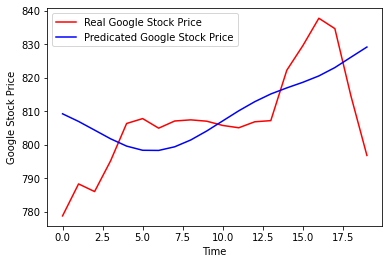

In [25]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicated_stock_price, color="blue", label="Predicated Google Stock Price")

plt.xlabel("Time")
plt.ylabel("Google Stock Price")

plt.legend()

plt.show()